<a href="https://colab.research.google.com/github/iheb12/the-sparks-foundation-internship/blob/main/Solution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#The Sparks Foundation----Internship-----
---
**Iheb Derbali**
---
**Data science & Buisness Analytics  --Task1--**



In [ ]:
#Importing librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the Data
df=pd.read_csv("http://bit.ly/w-data")
print("data imported succefully")

data imported succefully


#Data Analysis

In [ ]:
#Shape of the data
df.shape

(25, 2)

In [ ]:
#Some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Printing some observations
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#List of columns
list(df.columns)

['Hours', 'Scores']

In [ ]:
#Describing the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Counting the values
df.value_counts()

Hours  Scores
9.2    88        1
4.5    41        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.8    54        1
8.9    95        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
1.1    17        1
dtype: int64

In [ ]:
#Checking the missing values
df.isna().any()

Hours     False
Scores    False
dtype: bool

**there is no missing values**

In [ ]:
#Correlation between Hours and Scores
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#Data Visulization

```
# Ce texte est au format code
```

**

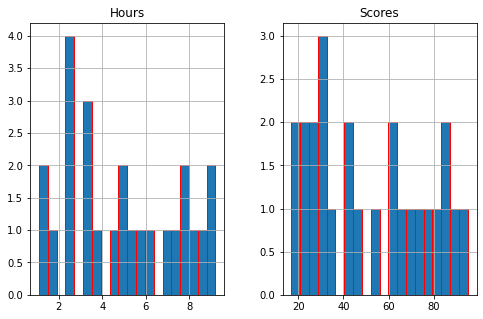

In [ ]:
#Histogram
df.hist(bins=20,edgecolor='red',figsize=(8,5))
plt.show()

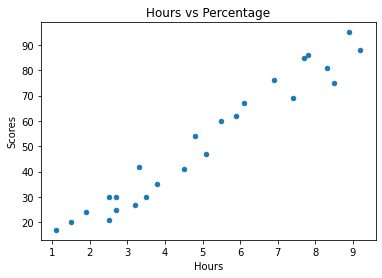

In [ ]:
#Scatter plot
df.plot(x='Hours',y='Scores',kind='scatter')
plt.title('Hours vs Percentage')  
plt.show()

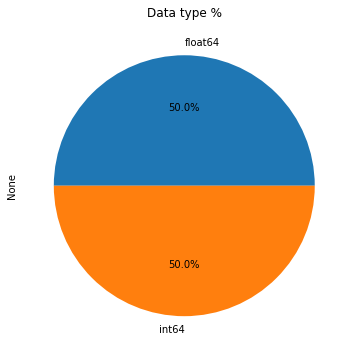

In [ ]:
#Pie plot
plt.figure(figsize=(10,6))
df.dtypes.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Data type %")
plt.show()

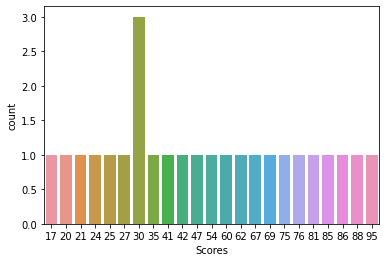

In [ ]:
sns.countplot(x='Scores',data=df)
plt.show()

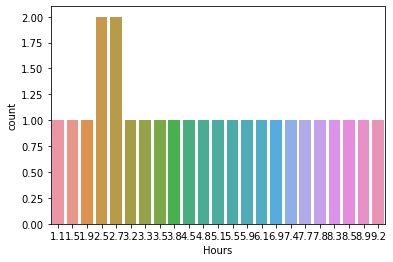

In [ ]:
sns.countplot(x='Hours',data=df)
plt.show()

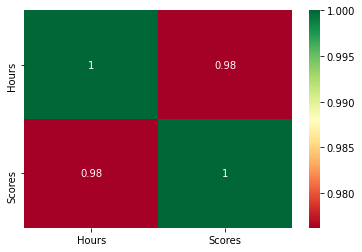

In [ ]:
#Heatmap correlation
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

#Data Preparing

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [ ]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
X.shape

(25, 1)

In [ ]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
y.shape

(25,)

#Machine learning

In [ ]:
#Importing librairies
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(17, 1)
(17,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(8, 1)
(8,)


#Fitting the model

In [ ]:
#Importing librairies
#Using linear regression algorithm
from sklearn.linear_model import LinearRegression  
lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lin_reg.predict(X_test)

In [ ]:
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


**Plotting the predictions**


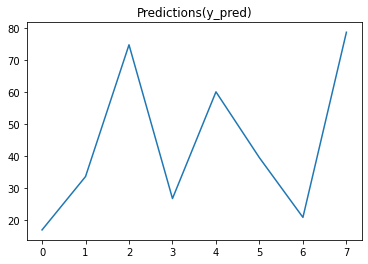

In [ ]:
plt.plot(y_pred)
plt.title("Predictions(y_pred)")
plt.show()

In [ ]:
df1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
df1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**Plotting the actual and the predicted**

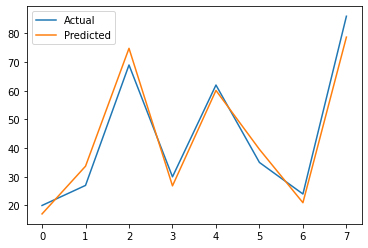

In [ ]:
plt.plot(df1)
plt.legend(["Actual","Predicted"])
plt.show()

In [ ]:
hours=np.array(9.25).reshape(-1,1)

In [ ]:
pred=lin_reg.predict(hours)
print("predicted score = {}".format(pred))

predicted score = [92.91505723]


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

4.419727808027651
